# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [133]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [134]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [135]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [136]:
df_train.shape

(15223, 52)

In [137]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [138]:
df_test.shape

(14910, 52)

In [139]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [140]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [141]:
df = df_test.append(df_train).reset_index(drop=True)

In [142]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [ ]:
def echo_columns_unique_values(data):
    for i in data.columns: # перебираем все столбцы
        if str(data[i].dtype) == 'object': # если тип столбца - object
            print('='*10)
            print(i) # выводим название столбца
            print(set(data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
            print('\n') # выводим пустую строку
            
echo_columns_unique_values(df)

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [145]:
# перенесено в Задание 1.

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [146]:
def show_skipped_data(data, descr_data):
    df_skipped = data.groupby(['sample']).aggregate(lambda x: x.isnull().mean()).T
    df_skipped = df_skipped[ (df_skipped['test']>0) | (df_skipped['train']>0)]
    df_skipped.loc[:,'description'] = descr_data.set_index(['ПОЛЕ']).loc[df_skipped.index]['ОПИСАНИЕ']
    return df_skipped

In [147]:
show_skipped_data(df, df_descr)

sample,test,train,description
GEN_INDUSTRY,0.090275,0.089798,отрасль работы клиента
GEN_TITLE,0.090275,0.089798,должность
ORG_TP_STATE,0.090275,0.089798,форма собственности компании
ORG_TP_FCAPITAL,0.090074,0.089667,отношение к иностранному капиталу
JOB_DIR,0.090275,0.089798,направление деятельности в нутри компании
TP_PROVINCE,0.019785,0.019379,"область торговой точки, где клиент брал послед..."
REGION_NM,0.000067,0.000066,регион РФ
WORK_TIME,0.090476,0.089864,время работы на текущем месте (в месяцах)
PREVIOUS_CARD_NUM_UTILIZED,0.979074,0.981081,количество уже утилизированных карт ( если пус...


#### 1.1 Что делаем с REGION_NM
Смотрим к каким географисеским данным привязаны неразмеченные наблюдения:

In [148]:
df.loc[df['REGION_NM'].isnull()][[
    'REG_ADDRESS_PROVINCE', 
    'FACT_ADDRESS_PROVINCE', 
    'POSTAL_ADDRESS_PROVINCE', 
    'REG_FACT_FL', 
    'FACT_POST_FL', 
    'REG_POST_FL'
]]

,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,REG_FACT_FL,FACT_POST_FL,REG_POST_FL
3099,Новосибирская область,Новосибирская область,Новосибирская область,1,1,1
17420,Новосибирская область,Новосибирская область,Новосибирская область,1,1,1


Видно, что найденные наблюдения привязаны к одной области и совпадают в трех случаях (фактический, регистрации, почтовый).
Теперь смотрим какие значения REGION_NM принимают найденные комбинации географических данных:

In [156]:
df.loc[~df['REGION_NM'].isnull()].loc[
    (df['REG_ADDRESS_PROVINCE']=="Новосибирская область") & (df['REG_FACT_FL']==1) & (df['FACT_POST_FL']==1) & (df['REG_POST_FL']==1)
].loc[:,['REGION_NM','AGREEMENT_RK']].groupby(['REGION_NM']).count()

,AGREEMENT_RK
REGION_NM,
ЗАПАДНО-СИБИРСКИЙ,370


##### Вывод 1.1
для соответствующией комбинации [REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE] признаку REGION_NM всегда присвоено значение 'ЗАПАДНО-СИБИРСКИЙ', вероятно два незаполненных наблюдения следствие ошибки сбора данных.
Заполним недостающие данные в REGION_NM занчением: "ЗАПАДНО-СИБИРСКИЙ"

#### Задание 1.2 Что делаем с PREVIOUS_CARD_NUM_UTILIZED
Смотрим описание для этого признака:

In [159]:
print( df_descr.set_index('ПОЛЕ').loc['PREVIOUS_CARD_NUM_UTILIZED','ОПИСАНИЕ'] )

количество уже утилизированных карт ( если пусто - 0) 


##### Вывод 1.2
Исходя из описания заполняем неразмеченный признак PREVIOUS_CARD_NUM_UTILIZED = 0

#### 1.3 Что делаем с TP_PROVINCE
Выявим зависимости между TP_PROVINCE и FACT_ADDRESS_PROVINCE

In [160]:
def find_dependence_TP_PROVINCE(data):
    
    unset_data = data.loc[df['TP_PROVINCE'].isnull()].pivot_table(values='AGREEMENT_RK', index='FACT_ADDRESS_PROVINCE', aggfunc='count')
    
    set_data = data.loc[~data['TP_PROVINCE'].isnull()].copy()
    set_data.loc[:,'equals'] = (set_data['TP_PROVINCE'] == set_data['FACT_ADDRESS_PROVINCE'])
    set_data = set_data.pivot_table(values='equals', index='FACT_ADDRESS_PROVINCE', aggfunc='mean')

    unset_data.loc[:,'Вероятность ошибки ручного присвоения признака'] = 1-set_data['equals']  
    
    return unset_data

find_dependence_TP_PROVINCE(df)
    

,AGREEMENT_RK,Вероятность ошибки ручного присвоения признака
FACT_ADDRESS_PROVINCE,,
Адыгея,1,0.366300
Владимирская область,1,0.006061
Дагестан,1,NaN
Калужская область,1,0.016529
Москва,166,0.571429
Московская область,363,1.000000
Пензенская область,2,0.033333
Саратовская область,1,0.017107
Ставропольский край,1,0.032258


In [161]:
print(
    'Доля откликов в наблюдениях с неразмеченным TP_PROVINCE {:.1%} против размеченных {:.1%}'.format(
        df_train.loc[df_train['TP_PROVINCE'].isnull()]['TARGET'].mean(), 
        df_train.loc[~df_train['TP_PROVINCE'].isnull()]['TARGET'].mean()
    )
)

Доля откликов в наблюдениях с неразмеченным TP_PROVINCE 25.8% против размеченных 11.6%


##### Вывод 1.3
Основная масса неразмеченных наблюдений приходится на клиентов с фактическим местом: Москва и область, Тюмень.
Люди из данных регионов слишком часто берут креиты в других городах, присвоить всем наблюдениям одинаковый признак может привести к накоплению ошибки.
Так как признак TP_PROVINCE достаточно значимый с точки зрения предсказания

Удалить данные с неразмеченным признаком TP_PROVINCE - значит потерять 2% выборки, при этом, в таких наблюдениях двукратно повышается отклик (TARGET=1)
Вероятно эта ошибка не случайна.

Вывод: пометим неразмеченный признак TP_PROVINCE как "Не определено"

#### 1.4 Что делаем с GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, JOB_DIR
Признакои GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, JOB_DIR пропущенны одновременно в каждом наблюдении, докажем это, а также то, что если указанные признаки пусты то и признаки WORK_TIME тоже пусты, но ORG_TP_FCAPITAL частично заполнен:

In [179]:
df.loc[ df['GEN_INDUSTRY'].isnull() ].loc[:,['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'JOB_DIR', 'WORK_TIME', 'ORG_TP_FCAPITAL']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 1 to 30131
Data columns (total 6 columns):
GEN_INDUSTRY       0 non-null object
GEN_TITLE          0 non-null object
ORG_TP_STATE       0 non-null object
JOB_DIR            0 non-null object
WORK_TIME          0 non-null float64
ORG_TP_FCAPITAL    6 non-null object
dtypes: float64(1), object(5)
memory usage: 148.4+ KB


Данные не заполнены в основном для пенсионеров / безработных

In [197]:
df.loc[ df['GEN_INDUSTRY'].isnull()].loc[:,['AGREEMENT_RK', 'SOCSTATUS_WORK_FL']].groupby('SOCSTATUS_WORK_FL').count()

,AGREEMENT_RK
SOCSTATUS_WORK_FL,
0,2712
1,1


In [172]:
print(
    'Доля откликов в наблюдениях с неразмеченными признаками {:.1%} против размеченных {:.1%}'.format(
        df_train.loc[df_train['GEN_INDUSTRY'].isnull()]['TARGET'].mean(), 
        df_train.loc[~df_train['GEN_INDUSTRY'].isnull()]['TARGET'].mean()
    )
)

Доля откликов в наблюдениях с неразмеченными признаками 3.7% против размеченных 12.7%


##### Вывод 1.4
Отказ от данных наблюдений недопустим, так как при их значительном весе (9% от всех данных), они сигнализируют о почти 4-х кратном снижении вероятности отклика клиента.

Вывод - разметить пустые признаки GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, JOB_DIR значением "Не определено"

#### 1.5 Что делаем с ORG_TP_FCAPITAL
Мы знаем, что признак ORG_TP_FCAPITAL заполнен в 6 случаях, когда GEN_INDUSTRY пустой, посмотрим сколько раз ORG_TP_FCAPITAL будет пустым, когда GEN_INDUSTRY заполнен:

In [186]:
df.loc[ ~df['GEN_INDUSTRY'].isnull() ].loc[ df['ORG_TP_FCAPITAL'].isnull() ].shape[0]

1

1 наблюдение будет на уровне шума для данного признака, но так как все остальное заполнено, терять данные не хотелось бы.
##### Вывод 1.5
Разметим пустые ORG_TP_FCAPITAL значением "Не определено", так как основная доля неразмеченных наблюдений приходится на вывод 1.4

#### 1.6 Что делаем с WORK_TIME
Проверим зависимость с признаком SOCSTATUS_WORK_FL

In [228]:
df.loc[df['WORK_TIME'].isnull()].loc[:,['AGREEMENT_RK', 'SOCSTATUS_WORK_FL']].groupby('SOCSTATUS_WORK_FL').count()

,AGREEMENT_RK
SOCSTATUS_WORK_FL,
0,2716
1,1


1 наблюдение установлено для работающего клиента, изучим его:

In [229]:
df.loc[ df['WORK_TIME'].isnull() & (df['SOCSTATUS_WORK_FL']==1) ].loc[:,'GEN_INDUSTRY']

22873    NaN
Name: GEN_INDUSTRY, dtype: object

Место работы не заполнено, значит и время работы на текущем месте равно нулю
##### Вывод 1.6
Присвоить всем пустым полям признака WORK_TIME значение = 0

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [225]:
#категориальные признаки
print("Следующие признаки являются категориальными:\n" + '\n'.join(
    [x for x in df.columns if (
        (str(df[x].dtype) == 'object') & 
        ~(x in ['CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT','PERSONAL_INCOME', 'sample'])
    )]
))


Следующие признаки являются категориальными:
EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM


#### 2.1 Категории EDUCATION

In [267]:
df_train.groupby(['EDUCATION']).agg({'AGREEMENT_RK':'count', 'TARGET':'mean'}).sort_values('TARGET')

,AGREEMENT_RK,TARGET
EDUCATION,,
Ученая степень,1,0.000000
Высшее,3133,0.106926
Среднее,4679,0.114768
Среднее специальное,6518,0.120589
Неполное среднее,340,0.141176
Неоконченное высшее,532,0.191729
Два и более высших образования,20,0.200000


##### Вывод 2.1
Для признака EDUCATION при всем желании устновить последовательность, этого делать не стоит, так как значение "Высшее" ломает тенденцию по отклику клиентов, хотя по логике должно находится между "неоконченным высшим" и "два и более..."
Значение "Ученая степень" встречается единожды и не является репрезентативным, поэтому соединим его со значением "Два и более высших образования".
Преобразуем значения в индексы, которые позднее преобразем с помощью one_hot метода.

Матрица присвоения индексов:

In [ ]:
{'Неполное среднее':0, 'Среднее':1, 'Среднее специальное':2, 'Неоконченное высшее':3, 'Высшее':4, 'Два и более высших образования':5, 'Ученая степень':5}

#### 2.2 Категории FAMILY_INCOME
Признак FAMILY_INCOME принимает значения:

In [254]:
df_train.groupby(['FAMILY_INCOME']).agg({'AGREEMENT_RK':'count', 'TARGET':'mean'}).sort_values('TARGET')

,AGREEMENT_RK,TARGET
FAMILY_INCOME,,
от 5000 до 10000 руб.,1512,0.083333
до 5000 руб.,60,0.100000
от 10000 до 20000 руб.,7077,0.108662
от 20000 до 50000 руб.,6082,0.131042
свыше 50000 руб.,492,0.231707


##### Вывод 2.2
В данном признаке наблюдается последовательность, заменим значения в том же признаке числовыми последовательными индексами, соответственно реализуем ее следующей матрицей:

In [ ]:
{'до 5000 руб.':0, 'от 5000 до 10000 руб.':1, 'от 10000 до 20000 руб.':2, 'от 20000 до 50000 руб.':3, 'свыше 50000 руб.':4}

#### 2.2.2 Числовые категории
Когда начал тестить черный ящик, понял, что фонит в данных очень сильно и начал руками чистить.
Написал следующие функции и тестировал с их помощью каждый столбец, чтобы подобрать оптимальные сочетания:

In [ ]:
def identify_clumn(column):
    dft = df_train.groupby([column]).agg({'AGREEMENT_RK':'count','TARGET':'mean'}).sort_values(['TARGET'])
    return dft

def identity_by_barier(column, barier):
    dft = dddd.copy()
    dft.loc[:,'added'] = dft[column].map(lambda x: x <= barier)
    dft = dft.groupby(['added']).agg({'AGREEMENT_RK':'count','TARGET':'mean'}).sort_values(['TARGET'])
    return dft

def identity_by_groups(column, barier, maximum = 10000):
    dft = dddd.copy()
    dft.loc[:,'added'] = dft[column].map(lambda x: x // barier if x // barier < maximum else maximum)
    dft = dft.groupby(['added']).agg({'AGREEMENT_RK':'count','TARGET':'mean'}).sort_values(['TARGET'])
    return dft

После чего определели следующие корректировки числовых признаков:

In [ ]:
#df_output.loc[:, 'CHILD_TOTAL'] = df_output.loc[:, 'CHILD_TOTAL'].map(lambda x: 0 if x <= 2 else 1)
#df_output.loc[:, 'DEPENDANTS'] = df_output.loc[:, 'DEPENDANTS'].map(lambda x: x if (x < 2) else 2)
#df_output.loc[:, 'AGE'] = df_output.loc[:, 'AGE'].map(lambda x: x // 10)
#df_output.loc[:, 'PERSONAL_INCOME'] = df_output.loc[:, 'PERSONAL_INCOME'].map(lambda x: x // 10000 if (x // 10000) < 3 else 3 )
#df_output.loc[:, 'OWN_AUTO'] = df_output.loc[:, 'CHILD_TOTAL'].map(lambda x: 0 if x == 0 else 1)
#df_output.loc[:, 'CREDIT'] = df_output.loc[:, 'CREDIT'].map(lambda x: 0 if x < 20000 else 1)
#df_output.loc[:, 'TERM'] = df_output.loc[:, 'TERM'].map(lambda x: x // 5 if (x//5 < 3) else 3)
#df_output.loc[:, 'FACT_LIVING_TERM'] = df_output.loc[:, 'FACT_LIVING_TERM'].map(lambda x: x // 60 if (x//60 < 5) else 5).map(lambda x: x if x > 0 else 0)
#df_output.loc[:, 'WORK_TIME'] = df_output.loc[:, 'WORK_TIME'].map(lambda x: x // 90 if (x//90 < 5) else 5)
#df_output.loc[:, 'LOAN_NUM_TOTAL'] = df_output.loc[:, 'FACT_LIVING_TERM'].map(lambda x: 1 if x==1 else 2)
#df_output.loc[:, 'LOAN_NUM_CLOSED'] = df_output.loc[:, 'LOAN_NUM_CLOSED'].map(lambda x: x if x<2 else 2)
#df_output.loc[:, 'LOAN_NUM_PAYM'] = df_output.loc[:, 'LOAN_NUM_PAYM'].map(lambda x: 0 if x<=6 else 1)
#df_output.loc[:, 'LOAN_DLQ_NUM'] = df_output.loc[:, 'LOAN_DLQ_NUM'].map(lambda x: 0 if x<1 else 1)
#df_output.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'] = df_output.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'].map(lambda x: 0 if x<1 else 1)

Также с помощью этих же функций определил данные, в которых я не видел однозначной зависимости, к тому же их включение в выборку резко роняло recall

In [ ]:
droped = [
    'EDUCATION',
    'GEN_INDUSTRY',
    'GEN_TITLE',
    'ORG_TP_FCAPITAL',
    'JOB_DIR',
    'REG_ADDRESS_PROVINCE',
    'FACT_ADDRESS_PROVINCE',
    'POSTAL_ADDRESS_PROVINCE',
    'TP_PROVINCE',
    'CHILD_TOTAL',
    'AUTO_RUS_FL',
    'FST_PAYMENT',
    'DL_DOCUMENT_FL',
    'GPF_DOCUMENT_FL',
    'REG_PHONE_FL',
    'LOAN_MAX_DLQ',
    'LOAN_AVG_DLQ_AMT',
    'REGION_NM'
]

#### 2.3 Категории по остальным признакам
По остальным категориальным признакам логичные последовательности отсутствуют, будем все их разворачивать методом one_hot

In [257]:
[x for x in df.columns if (
    (str(df[x].dtype) == 'object') & 
    ~(x in ['CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT','PERSONAL_INCOME', 'sample', 'FAMILY_INCOME'])
)]

['EDUCATION',
 'MARITAL_STATUS',
 'GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'REG_ADDRESS_PROVINCE',
 'FACT_ADDRESS_PROVINCE',
 'POSTAL_ADDRESS_PROVINCE',
 'TP_PROVINCE',
 'REGION_NM']

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [910]:
def preproc_data(df_input):
    
    df_output = df_input.copy()
    
    #удаляем созданный автором выгрузки идентификатор наблюдений
    df_output = df_output.drop(columns='AGREEMENT_RK')
    
    str_to_num = ['CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT','PERSONAL_INCOME']
    set_undefined = ['TP_PROVINCE', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'JOB_DIR', 'ORG_TP_FCAPITAL']
    
    undefined_value = 'Не_определно'
    
    #превращаем строки в числа
    for cname in str_to_num:
        df_output[cname] = df_output[cname].map(lambda x: x.replace(',','.')).astype('float')
    
    #согласно выводу 1.1
    df_output.loc[df_output['REGION_NM'].isnull(), 'REGION_NM'] = "ЗАПАДНО-СИБИРСКИЙ"
    
    #согласно выводу 1.2
    df_output.loc[(df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull()),'PREVIOUS_CARD_NUM_UTILIZED'] = 0 #установим 0 для всех неразмеченных данных
    
    #согласно выводам 1.3, 1.4, 1.5
    for cname in set_undefined:
        df_output.loc[df_output[cname].isnull(), cname] = undefined_value
    
    #согласно выводу 1.6
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    
    #согласно выводу 2.1
    EDUCATION_indexes = {
        'Неполное среднее':0, 
        'Среднее':1, 
        'Среднее специальное':2, 
        'Неоконченное высшее':3, 
        'Высшее':4, 
        'Два и более высших образования':5, 
        'Ученая степень':5
    }
    
    df_output.loc[:, 'EDUCATION'] = df_output.loc[:, 'EDUCATION'].map(EDUCATION_indexes) 

    #согласно выводу 2.2
    FAMILY_INCOME_indexes = {
        'до 5000 руб.':0, 
        'от 5000 до 10000 руб.':0, 
        'от 10000 до 20000 руб.':1, 
        'от 20000 до 50000 руб.':2, 
        'свыше 50000 руб.':3
    }
    
    df_output.loc[:, 'FAMILY_INCOME'] = df_output.loc[:, 'FAMILY_INCOME'].map(FAMILY_INCOME_indexes)  
    
    #согласно выводу 2.2.1
    df_output.loc[:, 'CHILD_TOTAL'] = df_output.loc[:, 'CHILD_TOTAL'].map(lambda x: 0 if x <= 2 else 1)
    df_output.loc[:, 'DEPENDANTS'] = df_output.loc[:, 'DEPENDANTS'].map(lambda x: x if (x < 2) else 2)
    df_output.loc[:, 'AGE'] = df_output.loc[:, 'AGE'].map(lambda x: x // 10)
    df_output.loc[:, 'PERSONAL_INCOME'] = df_output.loc[:, 'PERSONAL_INCOME'].map(lambda x: x // 10000 if (x // 10000) < 3 else 3 )
    df_output.loc[:, 'OWN_AUTO'] = df_output.loc[:, 'CHILD_TOTAL'].map(lambda x: 0 if x == 0 else 1)
    df_output.loc[:, 'CREDIT'] = df_output.loc[:, 'CREDIT'].map(lambda x: 0 if x < 20000 else 1)
    df_output.loc[:, 'TERM'] = df_output.loc[:, 'TERM'].map(lambda x: x // 5 if (x//5 < 3) else 3)
    df_output.loc[:, 'FACT_LIVING_TERM'] = df_output.loc[:, 'FACT_LIVING_TERM'].map(lambda x: x // 60 if (x//60 < 5) else 5).map(lambda x: x if x > 0 else 0)
    df_output.loc[:, 'WORK_TIME'] = df_output.loc[:, 'WORK_TIME'].map(lambda x: x // 90 if (x//90 < 5) else 5)
    df_output.loc[:, 'LOAN_NUM_TOTAL'] = df_output.loc[:, 'FACT_LIVING_TERM'].map(lambda x: 1 if x==1 else 2)
    df_output.loc[:, 'LOAN_NUM_CLOSED'] = df_output.loc[:, 'LOAN_NUM_CLOSED'].map(lambda x: x if x<2 else 2)
    df_output.loc[:, 'LOAN_NUM_PAYM'] = df_output.loc[:, 'LOAN_NUM_PAYM'].map(lambda x: 0 if x<=6 else 1)
    df_output.loc[:, 'LOAN_DLQ_NUM'] = df_output.loc[:, 'LOAN_DLQ_NUM'].map(lambda x: 0 if x<1 else 1)
    df_output.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'] = df_output.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'].map(lambda x: 0 if x<1 else 1)
    
    droped = [
        #'EDUCATION',
        'GEN_INDUSTRY',
        'GEN_TITLE',
        'ORG_TP_FCAPITAL',
        'JOB_DIR',
        'REG_ADDRESS_PROVINCE',
        'FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
        'TP_PROVINCE',
        'CHILD_TOTAL',
        'AUTO_RUS_FL',
        'FST_PAYMENT',
        'DL_DOCUMENT_FL',
        'GPF_DOCUMENT_FL',
        'REG_PHONE_FL',
        'LOAN_MAX_DLQ',
        'LOAN_AVG_DLQ_AMT',
        'REGION_NM'
    ]
    
    df_output = df_output.drop(columns=droped)
    
    #согласно выводу 2.3
    one_hot_categories = [
        'EDUCATION',
         'MARITAL_STATUS',
         'GEN_INDUSTRY',
         'GEN_TITLE',
         'ORG_TP_STATE',
         'ORG_TP_FCAPITAL',
         'JOB_DIR',
         'REG_ADDRESS_PROVINCE',
         'FACT_ADDRESS_PROVINCE',
         'POSTAL_ADDRESS_PROVINCE',
         'TP_PROVINCE',
         'REGION_NM'
    ]
    
    one_hot_categories = [x for x in one_hot_categories if not x in droped]
    
    df_output = pd.get_dummies(df_output, columns=one_hot_categories)
    
    
    
    return df_output

In [911]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [912]:
X = df_train_preproc.drop(columns='TARGET')
X_test = df_test_preproc.drop(columns='TARGET')

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [913]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

In [914]:
%%time
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def run_black_box(box, X_train, y_train, X_test):
    box.fit(X_train, y_train)
    predict = box.predict(X_test)
    predict_proba = box.predict_proba(X_test)
    return predict, predict_proba

dtc_predict, dtc_predict_proba = run_black_box(
    DecisionTreeClassifier(random_state = 42),
    X_tr, y_tr, X_ts
)

rfc_predict, rfc_predict_proba = run_black_box(
    RandomForestClassifier(n_estimators=10, random_state = 42),
    X_tr, y_tr, X_ts
)

lr_predict, lr_predict_proba = run_black_box(
    LogisticRegression(random_state = 42),
    X_tr, y_tr, X_ts
)

Wall time: 213 ms


In [915]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_apr(prefix, predict, y_test):
    print(prefix)
    print('precision = {:.2%}'.format(precision_score(y_test, predict)))
    print('recall = {:.2%}'.format(recall_score(y_test, predict)))
    print('accuracy = {:.2%}'.format(accuracy_score(y_test, predict)))
    print('f1 = {:.2%}'.format(f1_score(y_test, predict)))
    print("\n")

calculate_apr('DecisionTreeClassifier',dtc_predict, y_ts)
calculate_apr('RandomForestClassifier',rfc_predict, y_ts)
calculate_apr('LogisticRegression',lr_predict, y_ts)

DecisionTreeClassifier
precision = 15.82%
recall = 19.64%
accuracy = 77.53%
f1 = 17.52%


RandomForestClassifier
precision = 15.00%
recall = 1.08%
accuracy = 87.23%
f1 = 2.02%


LogisticRegression
precision = 100.00%
recall = 0.54%
accuracy = 87.91%
f1 = 1.08%




In [916]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve



(-0.01, 1.01)

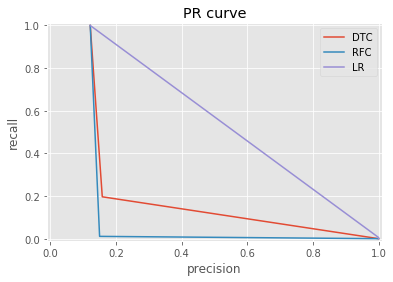

In [917]:
precision, recall, thresholds = precision_recall_curve( y_ts, dtc_predict)
plt.plot(precision, recall)

precision, recall, thresholds = precision_recall_curve( y_ts, rfc_predict)
plt.plot(precision, recall)

precision, recall, thresholds = precision_recall_curve( y_ts, lr_predict)
plt.plot(precision, recall)

plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.legend(['DTC','RFC','LR'])
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

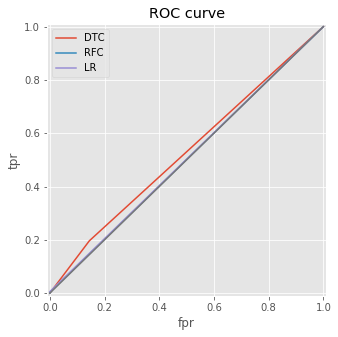

In [918]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(y_ts, dtc_predict)
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_ts, rfc_predict)
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_ts, lr_predict)
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend(['DTC','RFC','LR'])
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [919]:
print('ROC_AUC: DTS={:.2%}; RFC={:.2%}; LR={:.2%}'.format(roc_auc_score(y_ts, dtc_predict),roc_auc_score(y_ts, rfc_predict),roc_auc_score(y_ts, lr_predict)))

ROC_AUC: DTS=52.59%; RFC=50.12%; LR=50.27%


In [920]:
%%time

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


dtc_ra = cross_val_score(
    DecisionTreeClassifier(random_state = 42),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
).mean()


rfc_ra = cross_val_score(
    RandomForestClassifier(n_estimators=100, random_state = 42),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
).mean()

lr_ra = cross_val_score(
    LogisticRegression(random_state = 42),
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
).mean()

print(
    'ROC_AUC.mean(): DTC={:.2%}; RFC={:.2%}; LR={:.2%}'.format(
        dtc_ra,rfc_ra,lr_ra
    )
)

ROC_AUC.mean(): DTC=52.49%; RFC=63.00%; LR=67.92%
Wall time: 11.6 s


In [921]:
cross_val_score(
    LogisticRegression(random_state = 42),
    X,
    y,
    scoring='roc_auc',
    cv=3
)

array([0.66684824, 0.67364716, 0.69723895])

In [922]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

predict, predict_proba = run_black_box(
    LogisticRegression(random_state = 42),
    X, y, X_test
)

calculate_apr('',predict, y_test)


precision = 42.31%
recall = 0.63%
accuracy = 88.24%
f1 = 1.24%




(-0.01, 1.01)

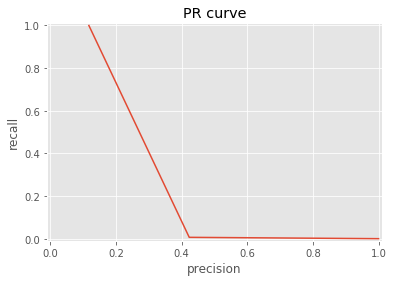

In [923]:
precision, recall, thresholds = precision_recall_curve( y_test, predict)
plt.plot(precision, recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

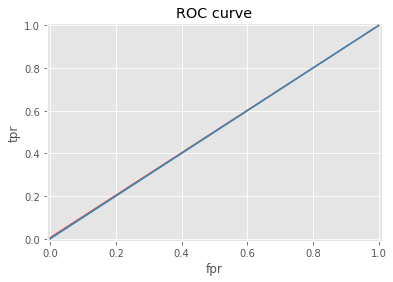

In [924]:
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [925]:
# Померить roc_auc на тесте

In [926]:
print('ROC_AUC: LR={:.2%}'.format(roc_auc_score(y_test, predict)))

ROC_AUC: LR=50.26%
